### Intializing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Calling the data sets and defing the data set into a variable


#### Exploratory data anlysis over the data

In [2]:
df = pd.read_csv('Sales.csv')
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [3]:
df.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

#### Dropping the unwanted columns and make dummies of the data set

In [4]:
df = df.drop(['Order','SoldCount','ReleaseYear','SKU_number','New_Release_Flag'] , axis = 1)
df = pd.get_dummies(df)

In [5]:
df.head()

,SoldFlag,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
0,0.0,15,682743.0,44.99,8,28.97,31.84,0,1,1,0
1,0.0,7,1016014.0,24.81,39,0.00,15.54,0,1,1,0
2,0.0,0,340464.0,46.00,34,30.19,27.97,0,1,1,0
3,1.0,4,334011.0,100.00,20,133.93,83.15,0,1,1,0
4,1.0,2,1287938.0,121.95,28,4.00,23.99,0,1,1,0


In [6]:
df.shape

(198917, 11)

In [7]:
df.isnull().sum()

SoldFlag                122921
ReleaseNumber                0
StrengthFactor               0
PriceReg                     0
ItemCount                    0
LowUserPrice                 0
LowNetPrice                  0
File_Type_Active             0
File_Type_Historical         0
MarketingType_D              0
MarketingType_S              0
dtype: int64

####  With seaborn library making therealtionship with each columns

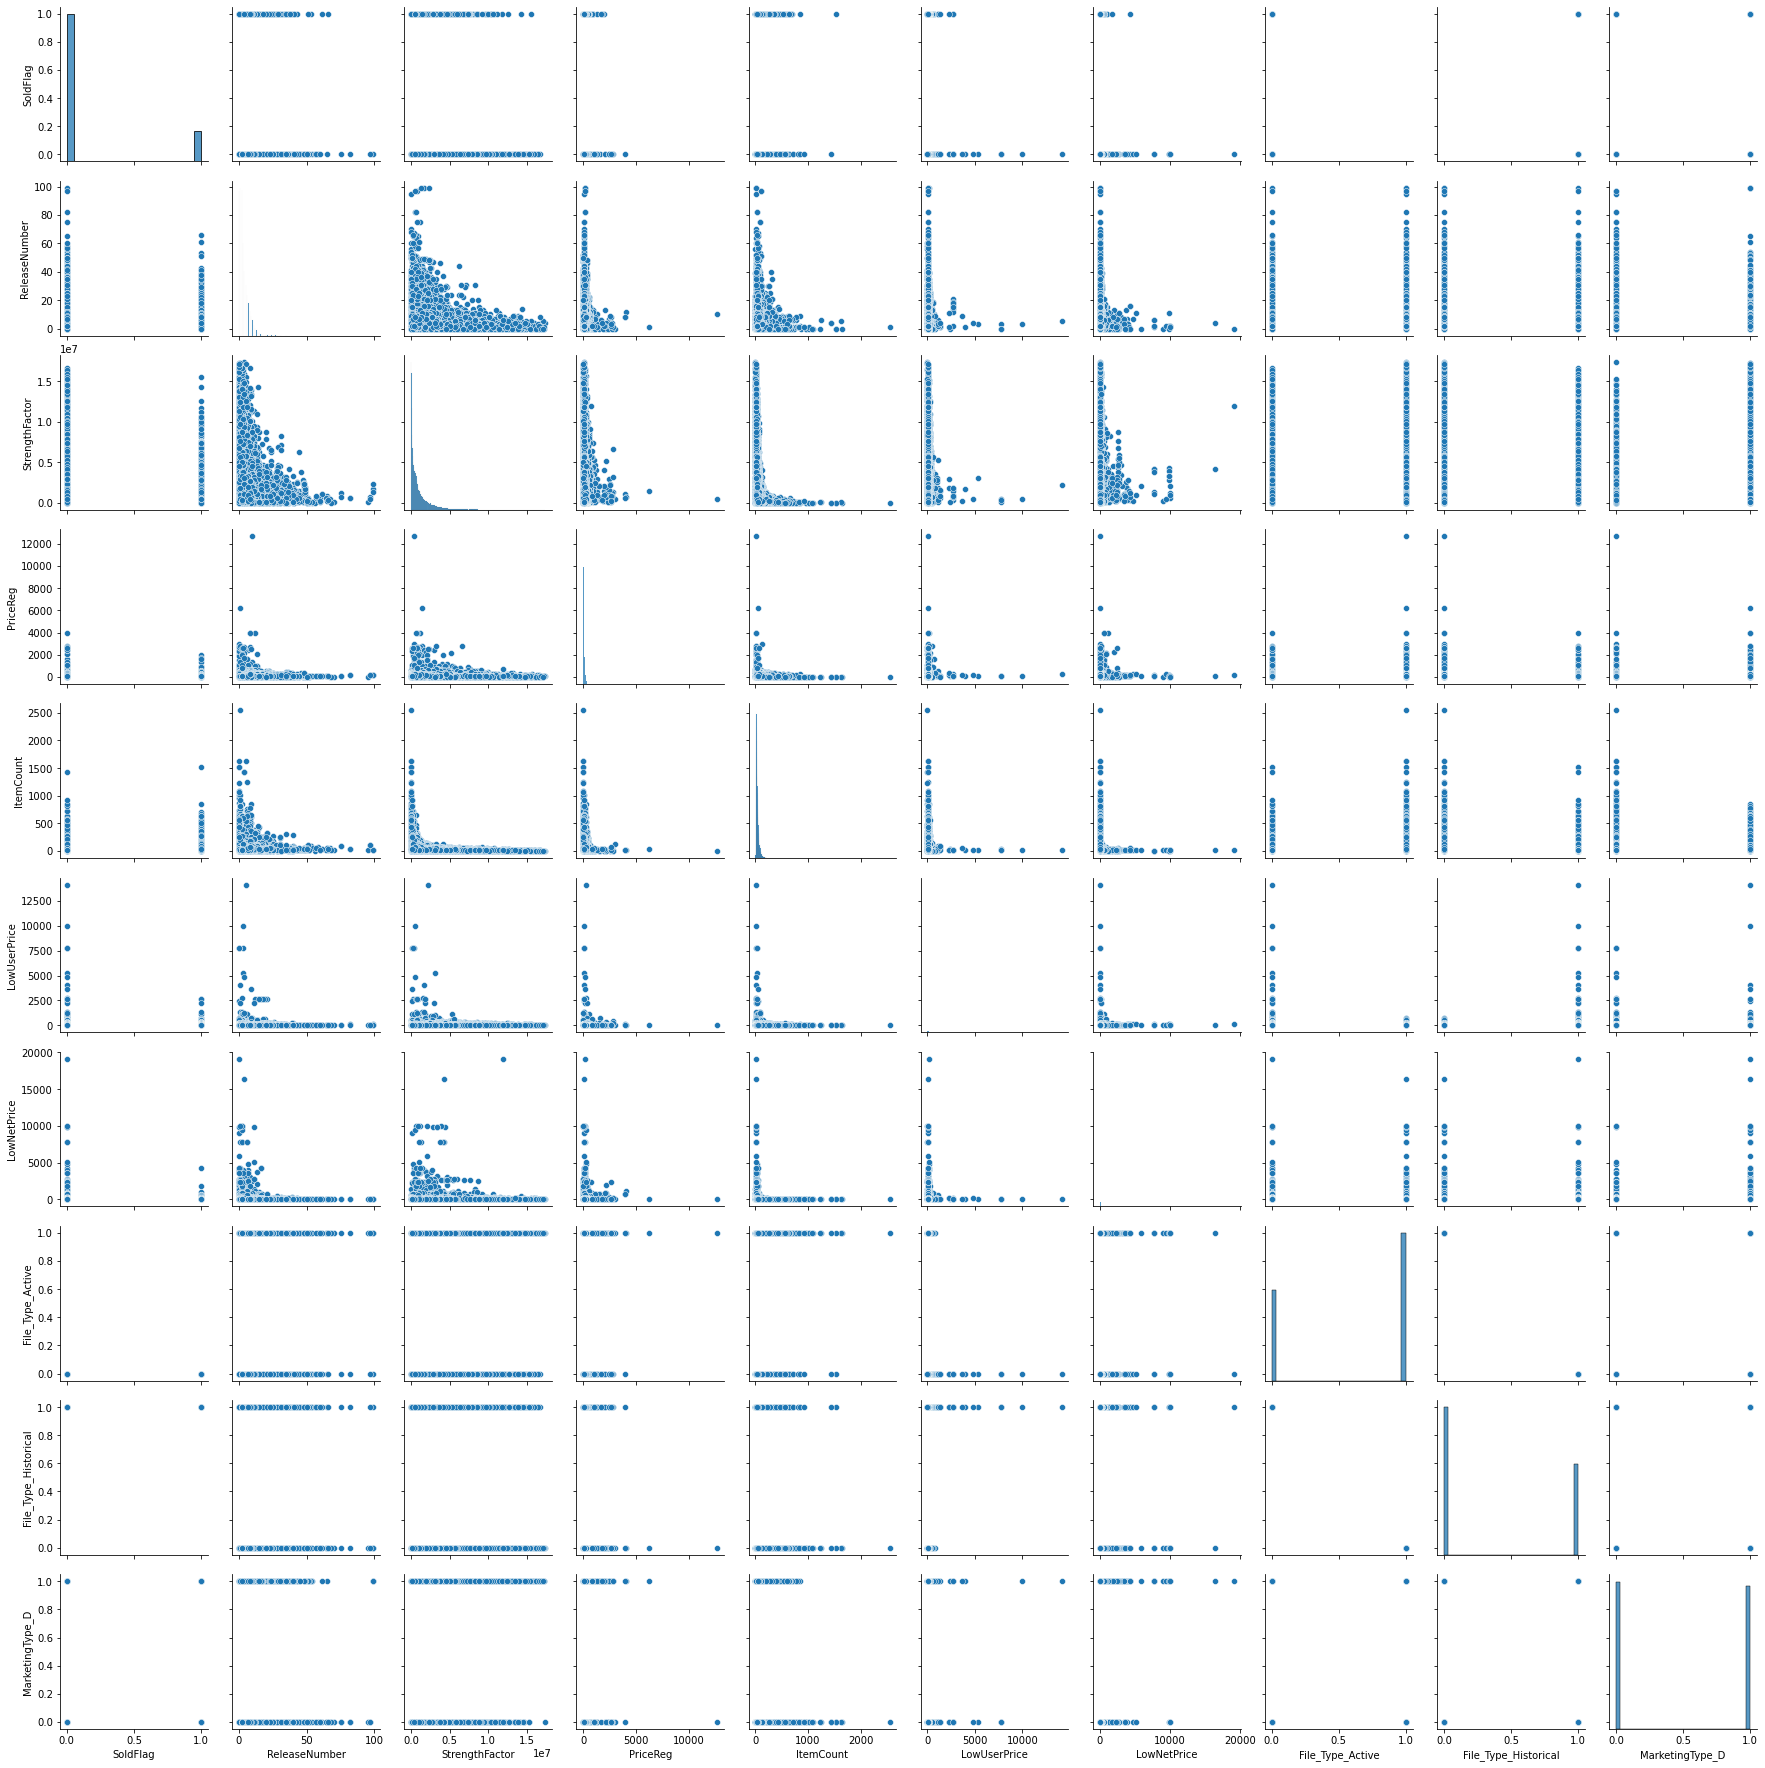

In [8]:
import seaborn as sns
sns.pairplot(df.iloc[:,:-1])

In [9]:
df.corr()

,SoldFlag,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
SoldFlag,1.000000,0.075940,-0.144816,0.084213,0.236860,0.058525,-0.013734,NaN,NaN,0.220692,-0.220692
ReleaseNumber,0.075940,1.000000,-0.066511,0.167343,0.164814,0.086223,0.017594,-0.150642,0.150642,0.044706,-0.044706
StrengthFactor,-0.144816,-0.066511,1.000000,0.033239,-0.249535,0.022484,0.055824,-0.054409,0.054409,0.314011,-0.314011
PriceReg,0.084213,0.167343,0.033239,1.000000,0.067112,0.135210,0.117767,-0.071030,0.071030,0.160178,-0.160178
ItemCount,0.236860,0.164814,-0.249535,0.067112,1.000000,0.002236,-0.071282,-0.050631,0.050631,0.069350,-0.069350
LowUserPrice,0.058525,0.086223,0.022484,0.135210,0.002236,1.000000,0.045149,-0.292880,0.292880,0.040640,-0.040640
LowNetPrice,-0.013734,0.017594,0.055824,0.117767,-0.071282,0.045149,1.000000,-0.002167,0.002167,0.041853,-0.041853
File_Type_Active,NaN,-0.150642,-0.054409,-0.071030,-0.050631,-0.292880,-0.002167,1.000000,-1.000000,0.047821,-0.047821
File_Type_Historical,NaN,0.150642,0.054409,0.071030,0.050631,0.292880,0.002167,-1.000000,1.000000,-0.047821,0.047821
MarketingType_D,0.220692,0.044706,0.314011,0.160178,0.069350,0.040640,0.041853,0.047821,-0.047821,1.000000,-1.000000


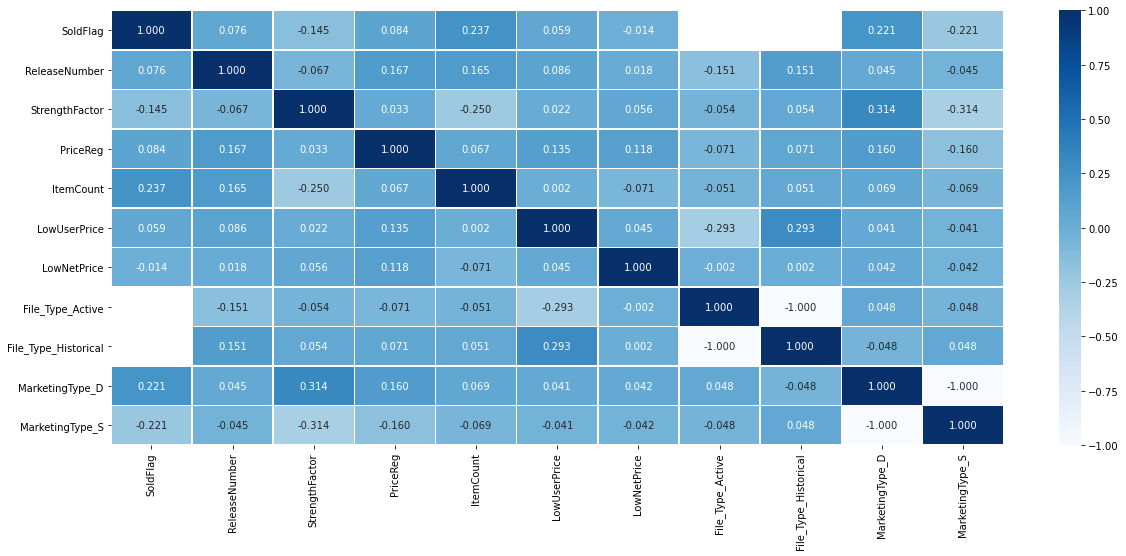

In [10]:
plt.figure(figsize=(20,8))
ax = sns.heatmap(df.corr(),annot = True, fmt =".3f",linewidths=.5, cmap="Blues")

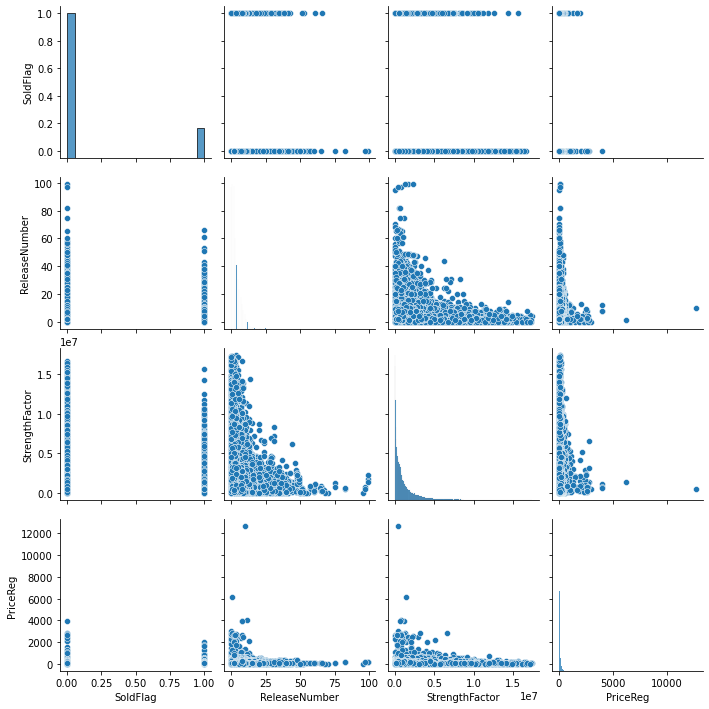

In [11]:
sns.pairplot(df.iloc[:,0:4])

In [12]:
train=df[df.SoldFlag.notnull()]
X = train.drop(["SoldFlag"],axis=1)
Y = train.SoldFlag

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [14]:
x_train.head()

,ReleaseNumber,StrengthFactor,PriceReg,ItemCount,LowUserPrice,LowNetPrice,File_Type_Active,File_Type_Historical,MarketingType_D,MarketingType_S
22530,10,783133.0,89.95,30,50.80,76.95,0,1,1,0
63902,2,391468.0,95.00,15,0.00,32.99,0,1,0,1
33237,4,1134536.0,106.00,44,75.00,45.77,0,1,1,0
19334,2,2157176.0,60.00,14,0.00,58.51,0,1,1,0
73705,3,131805.0,44.99,53,30.79,36.99,0,1,0,1


#### As in the pairplot we can test the data with Logistic Regression..In the output we can say that output is continues so regression is best and check this with logistci regression 

### Model Building

#### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
main_model = LogisticRegression()

In [17]:
main_model.fit(x_train,y_train)

LogisticRegression()

#### Prediction

In [18]:
y_pred = main_model.predict(x_test)

### Evaluation

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
accuracy_score(y_test,y_pred)

0.8272292644414229

In [21]:
confusion_matrix(y_test,y_pred)

array([[18860,     0],
       [ 3939,     0]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18860
         1.0       0.00      0.00      0.00      3939

    accuracy                           0.83     22799
   macro avg       0.41      0.50      0.45     22799
weighted avg       0.68      0.83      0.75     22799



C:\Users\vishn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'Actual')

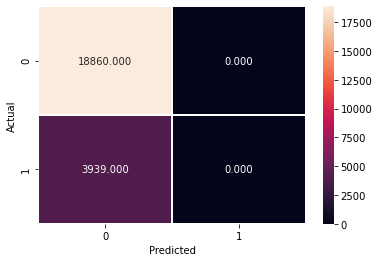

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt=".3f",linewidths=.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier(criterion='gini', random_state = 0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
model.score(x_test,y_test)

0.7488924952848809

In [27]:
model.score(x_train,y_train)

1.0

In [28]:
from sklearn import tree


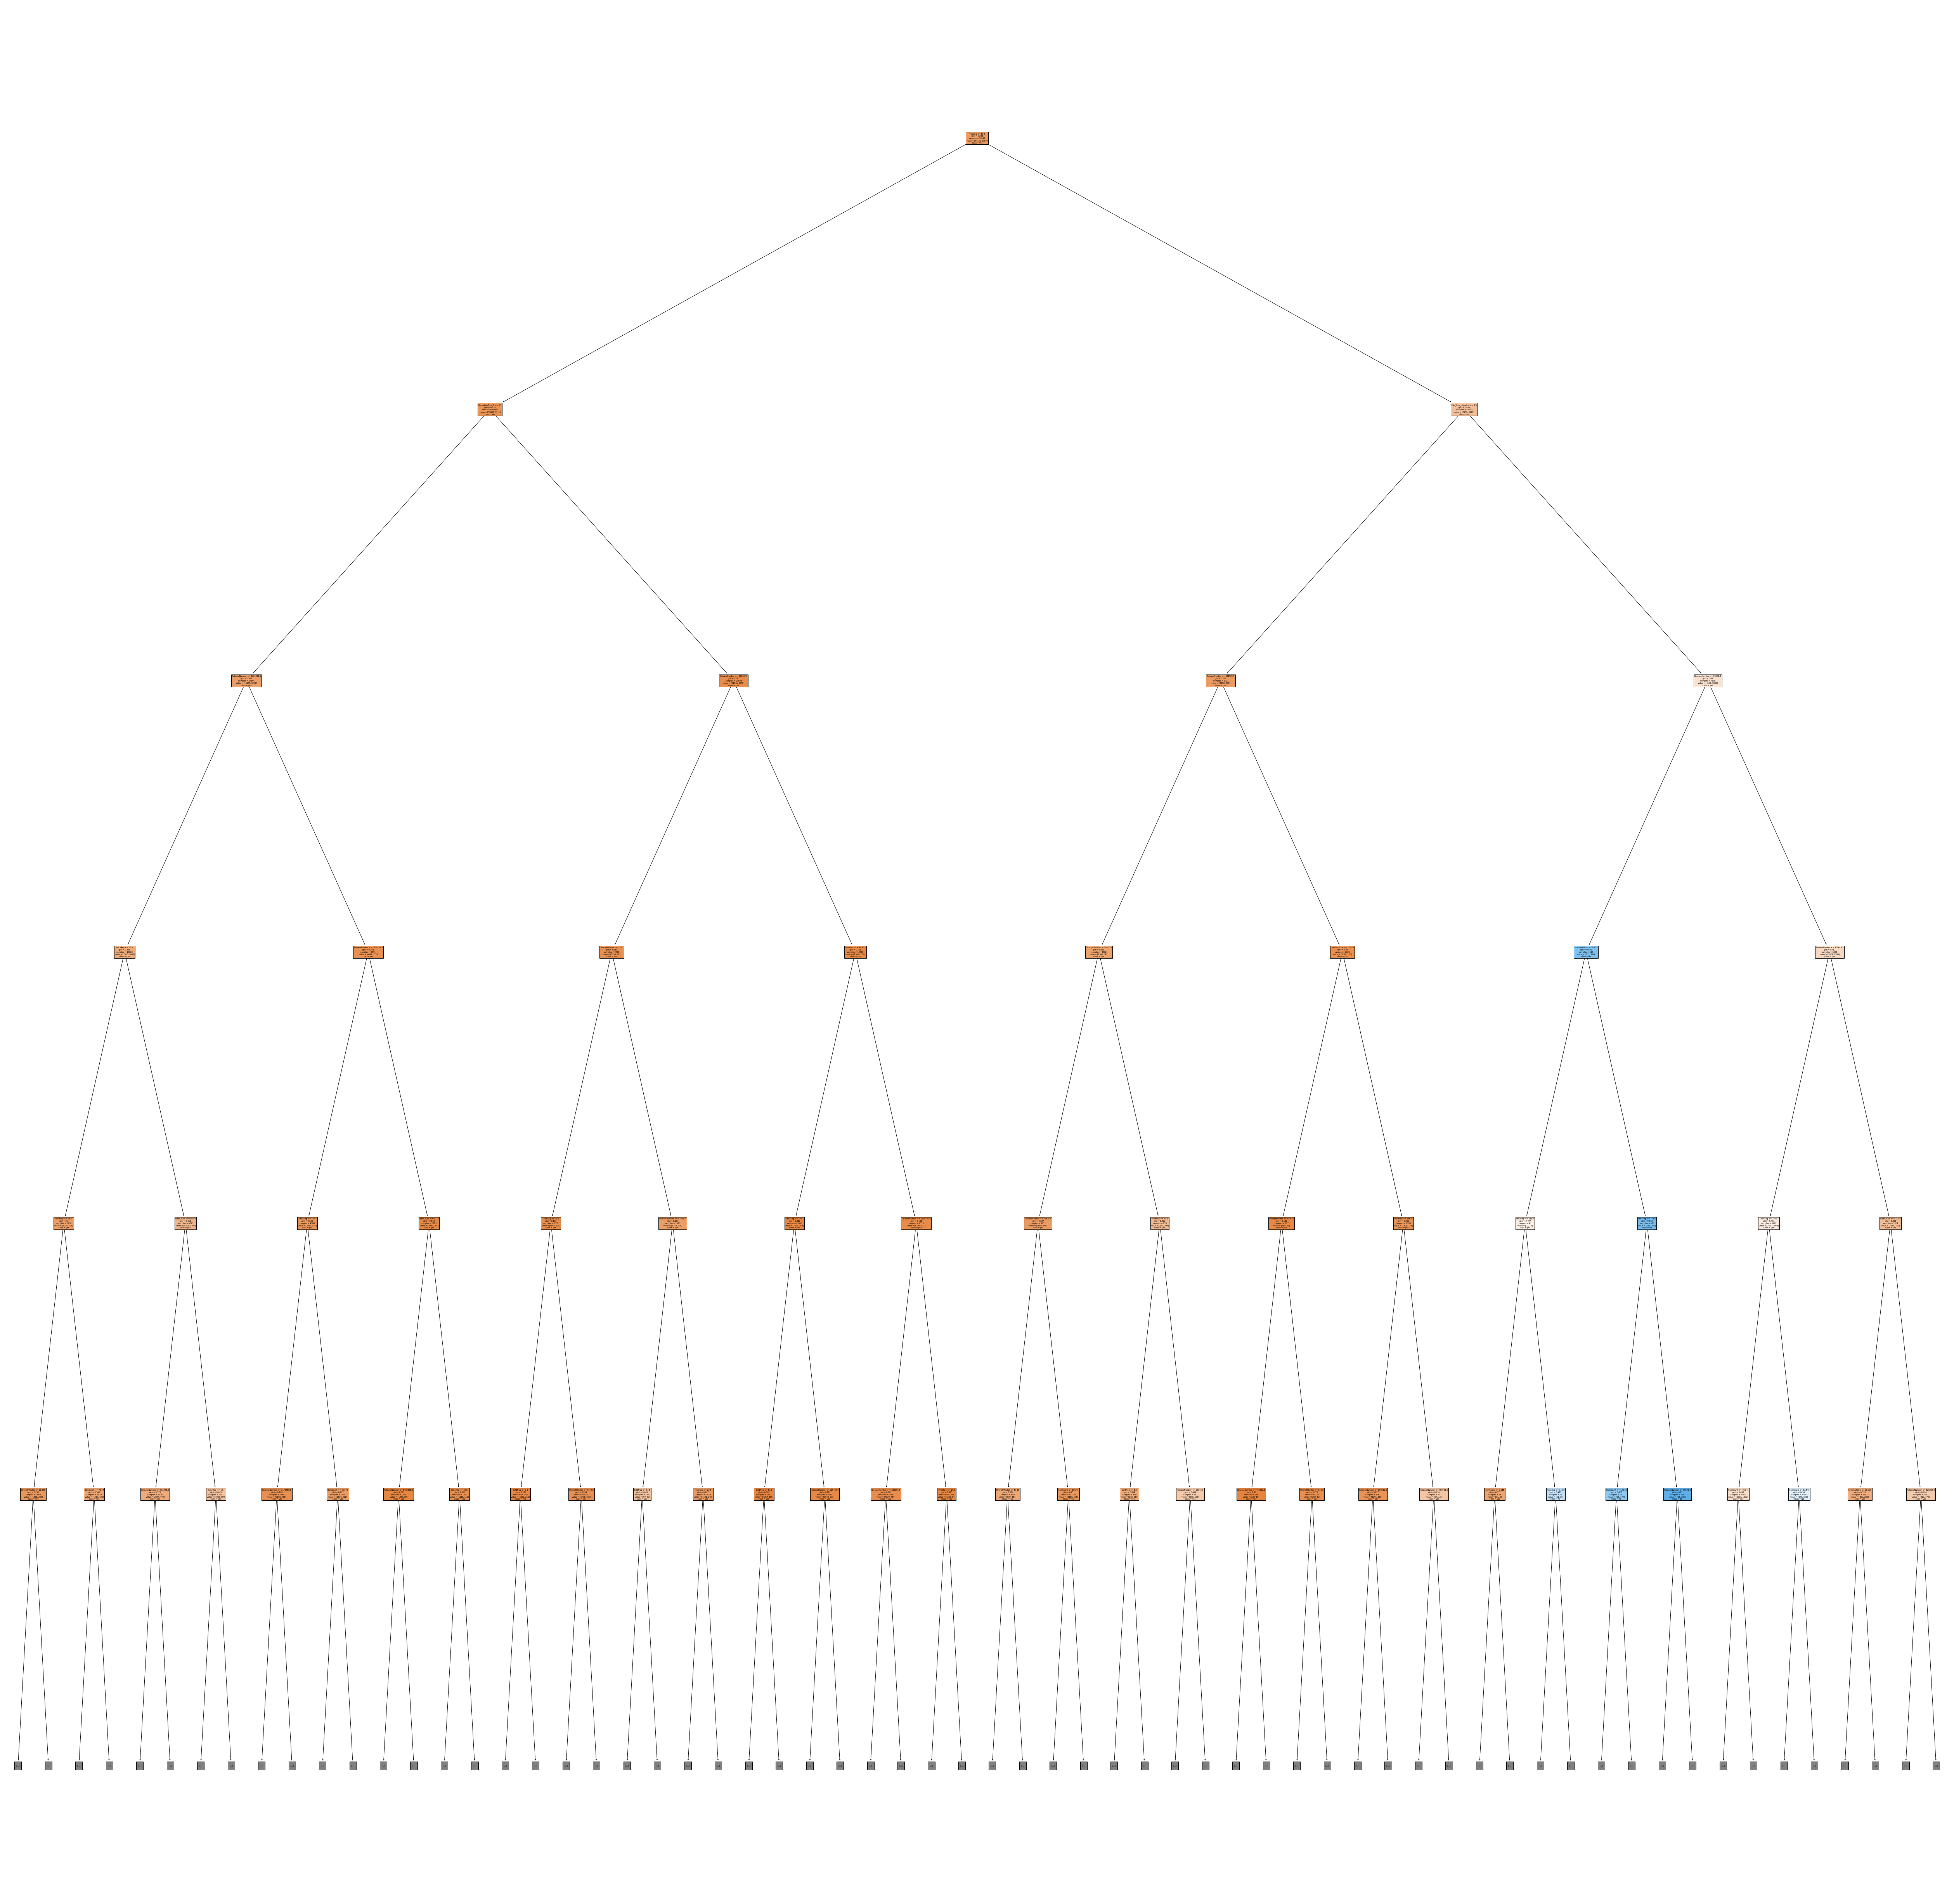

In [29]:
plt.figure(figsize=(90,90))
_ = tree.plot_tree(model,max_depth=5,feature_names=df.columns[:-1],class_names=['yes','No'],filled=True)